Populating the interactive namespace from numpy and matplotlib
Cu_orbs =  ['d3z2r2', 'dx2y2', 'dxy', 'dxz', 'dyz']
O1_orbs =  ['px']
O2_orbs =  ['py']
symmetries =  ['1A1']
E_1S =  12.66
E_1G =  8.26
E_1D =  7.21
E_3P =  7.55
E_3F =  5.3
30


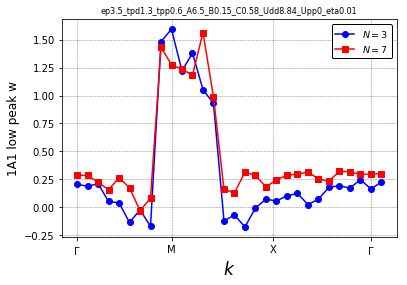

In [1]:
# Supplemental program for 1A1_lowest_peak_dispersion.ipynb
# to compare the Aw and w position for the lowest peak in 1A1 channel
# for 3-, 7-orbital models

%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')
from pylab import *

import parameters as pam
import lattice as lat
import variational_space as vs
import hamiltonian as ham
import basis_change as basis
import lanczos

ed = 0
ep = 3.5

tpd = 1.3
tpp = 0.6

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0

project = 0
eta = 0.01

Norb3 = 3
Norb7 = 7
Mc3 = 160
Mc7 = 60

fNorb3 = 'ep'+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+ \
            '_Udd'+str(Udd)+'_Upp'+str(Upp)+'_Mc'+str(Mc3)+'_Norb'+str(Norb3)+'_proj'+str(project)+'_eta'+str(eta)
fNorb7 = 'ep'+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+ \
            '_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_Mc'+str(Mc7)+ \
            '_Norb'+str(Norb7)+'_proj'+str(project)+'_eta'+str(eta)
titlename = 'ep'+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+ \
            '_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Udd'+str(Udd)+'_Upp'+str(Upp) +'_eta'+str(eta)     

##########################################################################
# compare w of lowest peak
##########################################################################
Ms = ['-b','-r','-g','-m','-c','-k','-y','--b','--r','--g','--m','--c','--k','--y']

a = loadtxt('./data_1A1_lowest_peak_dispersion/'+fNorb3+'.txt',skiprows=1)
cnt = len(a)
print cnt
plot(arange(0,cnt), a[:,2], '-bo', label="$N=3$")

a = loadtxt('./data_1A1_lowest_peak_dispersion/'+fNorb7+'.txt',skiprows=1)
cnt = len(a)
plot(arange(0,cnt), a[:,2], '-rs', label="$N=7$")

title(titlename, fontsize=8)
xlabel('$k$',fontsize=17)
ylabel('1A1 low peak w',fontsize=12)
xticks((0,(cnt-2)/3,2.*(cnt-2)/3,(cnt-2)), (r'$\Gamma$','M','X',r'$\Gamma$'))
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("compare_1A1_w_lowpeak_dispersion_"+titlename+".pdf")

30


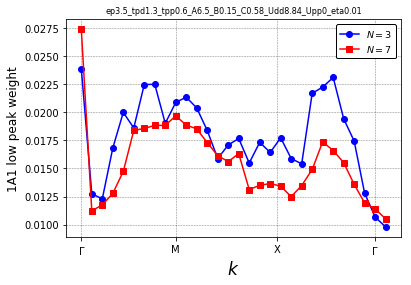

In [2]:
##########################################################################
# compare Aw of lowest peak
##########################################################################
#clf()
a = loadtxt('./data_1A1_lowest_peak_dispersion/'+fNorb3+'.txt',skiprows=1)
cnt = len(a)
print cnt
plot(arange(0,cnt), a[:,3], '-bo', label="$N=3$")

a = loadtxt('./data_1A1_lowest_peak_dispersion/'+fNorb7+'.txt',skiprows=1)
cnt = len(a)
plot(arange(0,cnt), a[:,3], '-rs', label="$N=7$")

title(titlename, fontsize=8)
xlabel('$k$',fontsize=17)
ylabel('1A1 low peak weight',fontsize=12)
xticks((0,(cnt-2)/3,2.*(cnt-2)/3,(cnt-2)), (r'$\Gamma$','M','X',r'$\Gamma$'))
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("compare_1A1_Aw_lowpeak_dispersion_"+titlename+".pdf")